# ASTR3110 Tutorial 2: Pandas

Tutorial 2 of the *'Data Science Techniques in Astrophysics'* course at Macquarie University.

## Learning outcomes from this tutorial

 * Understand the concept of a 'dataframe'
 * Learn how to read and write data into/out of a dataframe
 * Learn how to inspect and slice the tabular data
 * Practice common operations like adding columns and rows
 * Query a table using logical expressions.
 * Merge tables using join operations
 * Learn about grouping operations.
 * Visualise the data in a table using common plots.

## Introduction  to Pandas

The *pandas* module ([https://pandas.pydata.org/](https://pandas.pydata.org/)) is an open-source python-based data manipulation tool that originated in the comercial world and is now an industry standard. It is conceptually similar to a Microsoft Excel spreadsheet: it allows the user to perform operations on tables of data. *Pandas* is very well documented and there are excellent tutorials available online:

 * [Online Documentation](https://pandas.pydata.org/docs/)
 * [Official 'Getting Started' Guide](https://pandas.pydata.org/docs/getting_started/10min.html)
 * [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

## Setup for Google Drive

Today we will be operating on actual data, so we need to start by linking to our Google drive. If you are running this notebook on a local machine you can safely ignore this section.

Open the [SETUP_COLAB](https://github.com/MQ-ASTR3110-2020/ASTR3110_Tutorial_Notebooks/blob/master/SETUP_COLAB.md) instructions in a new tab and copy the material to your Google drive. Go to drive.google.com, find the notebook 'ASTR3110_Tutorial_2_Pandas.ipynb' and open using Colab. Then make sure Google drive is mounted using the following code:

In [1]:
# Uncomment to ,ount your Google Drive space (IGNORE IF RUNNING LOCALLY)
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
# Get into the correct directory
#cd gdrive/'My Drive'

## Reading in data

The data we will be processing today is a catalogue of radio-bright objects detected by the Very Large Array. It consists of several different types of objects: HII Regions (ionised bubbles around high-mass stars), Planetary Nebulae (an end-phase of stellar evolution), Radio Stars (stars that have radio flares) and Radio Galaxies (black-holes in galaxies outside our own Milky Way. 

The data has been downloaded from the project website as comma separated variables (CSV) files and is split into several parts.

* DATA/CORNISH_HII.csv
* DATA/CORNISH_PN.csv
* DATA/CORNISH_STAR.csv
* DATA/CORNISH_RG.csv

Let's load each of these files into a pandas dataframe:

In [3]:
import pandas as pd

# Pandas has an inbuild CSV reader
hiiDF = pd.read_csv("DATA/CORNISH_HII.csv", comment="#")
print("The size of the HII table (rows, cols) =", hiiDF.shape)

The size of the HII table (rows, cols) = (288, 33)


In [4]:
# We can also display the first few lines
hiiDF.head()

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,mType,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig
0,G010.3009-00.1477,10.30088,-0.14770,272.23311,-20.09871,0.14,0.14,56.37,5.04,631.39,...,P,0,1,0,1,1,0,1,0,0
1,G010.3204-00.2328,10.32038,-0.23281,272.32303,-20.12308,1.09,1.08,8.02,0.84,32.43,...,P,0,0,0,1,0,0,1,0,0
2,G010.3204-00.2586,10.32042,-0.25857,272.34701,-20.13525,0.11,0.12,14.61,1.50,18.20,...,G,0,0,0,1,0,0,0,0,0
3,G010.4624+00.0343,10.46241,0.03427,272.14759,-19.86931,0.19,0.18,27.11,2.42,215.39,...,P,0,0,0,0,1,0,0,0,0
4,G010.4724+00.0275,10.47236,0.02750,272.15907,-19.86382,0.56,0.54,22.34,2.01,38.43,...,P,0,1,0,0,1,0,0,1,0


In [5]:
# Print all the column names and data types
# Pandas guesses the relevant type from the format of the data
print(hiiDF.dtypes)

Name                   object
l_deg                 float64
b_deg                 float64
RA_deg                float64
Dec_deg               float64
dRA_asec              float64
dDec_asec             float64
Peak_mJybm            float64
dPeak_mJybm           float64
Flux_mJy              float64
dFlux_mJy             float64
Angscale_asec         float64
dAngscale_asec        float64
AngscaleDecon_asec    float64
gaussMajor_asec       float64
dGaussMajor_asec      float64
gaussMinor_asec       float64
dGaussMminor_asec     float64
gaussPosangle_deg     float64
dGaussPosangle_deg    float64
RMS_mJybm             float64
Sky_mJybm             float64
Sigma                 float64
mType                  object
fArtefact               int64
fCluster                int64
fEdge                   int64
fHiNoise                int64
fHi5Sig                 int64
fNearBright             int64
fSmoothWeighting        int64
fOverlap7sig            int64
fOverlap5sig            int64
dtype: obj

All the other files have identical column names so we want to add a new column that contains an identifier for object type:

In [6]:
# Create a new column with the name 'objectType'
# and set all values to 'HII'
hiiDF["objectType"] = "HII"
hiiDF.head()

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig,objectType
0,G010.3009-00.1477,10.30088,-0.14770,272.23311,-20.09871,0.14,0.14,56.37,5.04,631.39,...,0,1,0,1,1,0,1,0,0,HII
1,G010.3204-00.2328,10.32038,-0.23281,272.32303,-20.12308,1.09,1.08,8.02,0.84,32.43,...,0,0,0,1,0,0,1,0,0,HII
2,G010.3204-00.2586,10.32042,-0.25857,272.34701,-20.13525,0.11,0.12,14.61,1.50,18.20,...,0,0,0,1,0,0,0,0,0,HII
3,G010.4624+00.0343,10.46241,0.03427,272.14759,-19.86931,0.19,0.18,27.11,2.42,215.39,...,0,0,0,0,1,0,0,0,0,HII
4,G010.4724+00.0275,10.47236,0.02750,272.15907,-19.86382,0.56,0.54,22.34,2.01,38.43,...,0,1,0,0,1,0,0,1,0,HII


Load the remaining catalogue files:

In [7]:
# Load the PNs
pnDF = pd.read_csv("DATA/CORNISH_PN.csv", comment="#")
pnDF["objectType"] = "PN"
print("The size of the PN table (rows, cols) =", pnDF.shape)

# Load the STARs
starDF = pd.read_csv("DATA/CORNISH_STAR.csv", comment="#")
starDF["objectType"] = "PN"
print("The size of the STAR table (rows, cols) =", starDF.shape)

# Load the Radio Galaxies
rgDF = pd.read_csv("DATA/CORNISH_RG.csv", comment="#")
rgDF["objectType"] = "RG"
print("The size of the RG table (rows, cols) =", rgDF.shape)

The size of the PN table (rows, cols) = (170, 34)
The size of the STAR table (rows, cols) = (130, 34)
The size of the RG table (rows, cols) = (418, 34)


## Massaging the catalogue tables

Because the tables have exactly the same columns, we can concatenate them into a master catalogue:

In [8]:
# Use the concat() function and supply a 
allDF = pd.concat([hiiDF, pnDF, starDF, rgDF])
print("The size of the full catalogue table (rows, cols) =", allDF.shape)

The size of the full catalogue table (rows, cols) = (1006, 34)


### Indexing

The tables are simply stacked on top of each other, maintaining the same order as when they were read in. We might want to order them by coordinate in the Galactic reference frame (longitude and latitude):

In [9]:
# Sort the rows by Galactic coordinates
allDF.sort_values(by=["l_deg", "b_deg"], inplace=True, ascending=True)
allDF

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig,objectType
0,G009.9702-00.5292,9.97016,-0.52920,272.41889,-20.57271,0.12,0.13,6.99,0.74,12.63,...,0,0,0,0,0,0,0,0,0,PN
0,G010.0500-00.6863,10.04996,-0.68627,272.60697,-20.57849,1.71,1.68,5.19,0.53,12.24,...,0,0,0,0,0,0,0,0,0,RG
1,G010.0989+00.7393,10.09889,0.73927,271.30448,-19.84291,0.12,0.12,64.96,5.79,475.99,...,0,0,0,0,0,0,0,0,0,PN
1,G010.1232-00.9590,10.12318,-0.95903,272.90001,-20.64600,0.10,0.10,15.42,1.42,22.61,...,0,1,0,0,0,0,0,0,0,RG
2,G010.1237-00.9564,10.12369,-0.95637,272.89778,-20.64427,0.11,0.11,8.78,0.86,9.88,...,0,1,0,0,0,0,0,0,0,RG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,G065.2147-00.8903,65.21471,-0.89028,299.79119,27.91745,0.17,0.17,1.29,0.21,1.29,...,0,1,0,0,0,0,0,0,0,RG
415,G065.2164-00.8911,65.21645,-0.89111,299.79303,27.91849,0.16,0.16,1.50,0.22,1.69,...,0,1,0,0,0,0,0,0,0,RG
129,G065.2462+00.3505,65.24617,0.35051,298.60673,28.58976,0.11,0.11,4.57,0.48,4.57,...,0,0,0,0,1,0,0,0,0,PN
416,G065.3209+00.2325,65.32087,0.23250,298.76581,28.59278,0.37,0.33,8.46,0.77,55.57,...,0,1,0,0,0,0,0,1,0,RG


Note here that the leftmost numbers above are actually an index for the table. Currently these numbers derive from the line number that the rows occupied in their original CSV file. We can do several things here:

In [10]:
# 1) Reset the index to a numeric value
allDF.reset_index(drop=True, inplace=True)
allDF

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig,objectType
0,G009.9702-00.5292,9.97016,-0.52920,272.41889,-20.57271,0.12,0.13,6.99,0.74,12.63,...,0,0,0,0,0,0,0,0,0,PN
1,G010.0500-00.6863,10.04996,-0.68627,272.60697,-20.57849,1.71,1.68,5.19,0.53,12.24,...,0,0,0,0,0,0,0,0,0,RG
2,G010.0989+00.7393,10.09889,0.73927,271.30448,-19.84291,0.12,0.12,64.96,5.79,475.99,...,0,0,0,0,0,0,0,0,0,PN
3,G010.1232-00.9590,10.12318,-0.95903,272.90001,-20.64600,0.10,0.10,15.42,1.42,22.61,...,0,1,0,0,0,0,0,0,0,RG
4,G010.1237-00.9564,10.12369,-0.95637,272.89778,-20.64427,0.11,0.11,8.78,0.86,9.88,...,0,1,0,0,0,0,0,0,0,RG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,G065.2147-00.8903,65.21471,-0.89028,299.79119,27.91745,0.17,0.17,1.29,0.21,1.29,...,0,1,0,0,0,0,0,0,0,RG
1002,G065.2164-00.8911,65.21645,-0.89111,299.79303,27.91849,0.16,0.16,1.50,0.22,1.69,...,0,1,0,0,0,0,0,0,0,RG
1003,G065.2462+00.3505,65.24617,0.35051,298.60673,28.58976,0.11,0.11,4.57,0.48,4.57,...,0,0,0,0,1,0,0,0,0,PN
1004,G065.3209+00.2325,65.32087,0.23250,298.76581,28.59278,0.37,0.33,8.46,0.77,55.57,...,0,1,0,0,0,0,0,1,0,RG


In [11]:
# 2) Set the unique 'Name' column to the index
allDF.set_index(["Name"], drop=False, inplace=True)
allDF

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig,objectType
Name,,,,,,,,,,,,,,,,,,,,,
G009.9702-00.5292,G009.9702-00.5292,9.97016,-0.52920,272.41889,-20.57271,0.12,0.13,6.99,0.74,12.63,...,0,0,0,0,0,0,0,0,0,PN
G010.0500-00.6863,G010.0500-00.6863,10.04996,-0.68627,272.60697,-20.57849,1.71,1.68,5.19,0.53,12.24,...,0,0,0,0,0,0,0,0,0,RG
G010.0989+00.7393,G010.0989+00.7393,10.09889,0.73927,271.30448,-19.84291,0.12,0.12,64.96,5.79,475.99,...,0,0,0,0,0,0,0,0,0,PN
G010.1232-00.9590,G010.1232-00.9590,10.12318,-0.95903,272.90001,-20.64600,0.10,0.10,15.42,1.42,22.61,...,0,1,0,0,0,0,0,0,0,RG
G010.1237-00.9564,G010.1237-00.9564,10.12369,-0.95637,272.89778,-20.64427,0.11,0.11,8.78,0.86,9.88,...,0,1,0,0,0,0,0,0,0,RG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G065.2147-00.8903,G065.2147-00.8903,65.21471,-0.89028,299.79119,27.91745,0.17,0.17,1.29,0.21,1.29,...,0,1,0,0,0,0,0,0,0,RG
G065.2164-00.8911,G065.2164-00.8911,65.21645,-0.89111,299.79303,27.91849,0.16,0.16,1.50,0.22,1.69,...,0,1,0,0,0,0,0,0,0,RG
G065.2462+00.3505,G065.2462+00.3505,65.24617,0.35051,298.60673,28.58976,0.11,0.11,4.57,0.48,4.57,...,0,0,0,0,1,0,0,0,0,PN


Here we have retained the 'Name' column by specifying ```drop=False``` - by default it is dropped'. Had we dropped it, we could add it back in later by executing ```allDF["Name"]=allDF.index```.

### Summary stats and missing data

The are lots of convenience methods in Pandas dataframe objects. For example, the ```dataframe.describe()``` returns a dataframe with summary statistics of each column:

In [12]:
# Calculate summary statistics
summaryDF = allDF.describe()
summaryDF

,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,dFlux_mJy,...,Sigma,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,...,1006.000000,1006.0,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,36.790826,-0.008792,284.761851,3.394871,0.298678,0.299066,21.577972,2.013091,120.367147,11.934801,...,53.329920,0.0,0.378728,0.011928,0.138171,0.163022,0.002982,0.109344,0.216700,0.036779
std,16.008604,0.567249,7.653575,14.162320,0.393068,0.391821,48.460278,4.297175,571.829061,51.526880,...,124.057847,0.0,0.485311,0.108618,0.345251,0.369569,0.054554,0.312225,0.412201,0.188313
min,9.970160,-1.154330,271.276440,-20.646000,0.100000,0.100000,1.290000,0.180000,1.290000,0.360000,...,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.698670,-0.393412,278.535605,-8.376655,0.110000,0.110000,3.745000,0.462500,6.815000,1.050000,...,10.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.056800,0.000135,283.985750,2.944290,0.150000,0.150000,7.110000,0.725000,16.025000,1.975000,...,19.600000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.271007,0.390903,290.977650,15.516255,0.257500,0.260000,17.790000,1.640000,51.140000,5.920000,...,45.900000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,65.323130,1.175300,299.793030,28.594370,3.210000,3.320000,701.800000,62.460000,12616.400000,1120.830000,...,2372.700000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can access the rows by their index:

In [13]:
# Access the 'mean' row and print
print("The mean row is {}".format(summaryDF.loc["mean"]))

The mean row is l_deg                  36.790826
b_deg                  -0.008792
RA_deg                284.761851
Dec_deg                 3.394871
dRA_asec                0.298678
dDec_asec               0.299066
Peak_mJybm             21.577972
dPeak_mJybm             2.013091
Flux_mJy              120.367147
dFlux_mJy              11.934801
Angscale_asec           3.187865
dAngscale_asec          0.080858
AngscaleDecon_asec      3.769572
gaussMajor_asec         2.078572
dGaussMajor_asec        0.188232
gaussMinor_asec         1.750382
dGaussMminor_asec       0.134625
gaussPosangle_deg      87.695335
dGaussPosangle_deg     30.516525
RMS_mJybm               0.421083
Sky_mJybm              -0.006173
Sigma                  53.329920
fArtefact               0.000000
fCluster                0.378728
fEdge                   0.011928
fHiNoise                0.138171
fHi5Sig                 0.163022
fNearBright             0.002982
fSmoothWeighting        0.109344
fOverlap7sig            0.2

Note that when accessing a single row or column, the result is returned as a *Pandas series*.

In [14]:
# Access the 'Flux_mJy' value in the 'mean' row.
print("The mean value for radio flux is {:.2f} mJy".format(summaryDF.loc["mean", "Flux_mJy"]))

The mean value for radio flux is 120.37 mJy


Here we use the important ```.loc()``` method to address a row by its index value. We could also specify its row number using the ```.iloc()``` method:

In [15]:
# Access the standard deviation on the 'Flux_mJy' value in the 3rd row
# Remember, python is zero-indexed.
print("The standard deviation on the radio flux is {:.2f} mJy".format(summaryDF.iloc[2]["Flux_mJy"]))

The standard deviation on the radio flux is 571.83 mJy


In [16]:
# Or access the whole 100th row of the catalogue
allDF.iloc[99]

Name                  G015.4857+00.3403
l_deg                           15.4857
b_deg                           0.34028
RA_deg                          274.394
Dec_deg                        -15.3139
dRA_asec                           0.78
dDec_asec                          0.72
Peak_mJybm                         6.25
dPeak_mJybm                        0.58
Flux_mJy                          20.18
dFlux_mJy                          2.34
Angscale_asec                     4.753
dAngscale_asec                    0.044
AngscaleDecon_asec                  4.5
gaussMajor_asec                     NaN
dGaussMajor_asec                    NaN
gaussMinor_asec                     NaN
dGaussMminor_asec                   NaN
gaussPosangle_deg                   NaN
dGaussPosangle_deg                  NaN
RMS_mJybm                          0.33
Sky_mJybm                        -0.009
Sigma                              18.3
mType                                 P
fArtefact                             0


Many datasets will have missing data, which are set to NaN in a Pandas dataframe. To figure out where these are occuring do the following:

In [17]:
# Count the number of NULL or missing values in each column
pd.options.mode.use_inf_as_na = True
allDF.isnull().sum()

Name                    0
l_deg                   0
b_deg                   0
RA_deg                  0
Dec_deg                 0
dRA_asec                0
dDec_asec               0
Peak_mJybm              0
dPeak_mJybm             0
Flux_mJy                0
dFlux_mJy               0
Angscale_asec           0
dAngscale_asec          0
AngscaleDecon_asec    398
gaussMajor_asec       368
dGaussMajor_asec      368
gaussMinor_asec       368
dGaussMminor_asec     368
gaussPosangle_deg     368
dGaussPosangle_deg    368
RMS_mJybm               0
Sky_mJybm               0
Sigma                   0
mType                   0
fArtefact               0
fCluster                0
fEdge                   0
fHiNoise                0
fHi5Sig                 0
fNearBright             0
fSmoothWeighting        0
fOverlap7sig            0
fOverlap5sig            0
objectType              0
dtype: int64

In [18]:
# Make a boolean mask to pick out NULL values
mask = allDF["AngscaleDecon_asec"].isnull()
allDF[mask]

,Name,l_deg,b_deg,RA_deg,Dec_deg,dRA_asec,dDec_asec,Peak_mJybm,dPeak_mJybm,Flux_mJy,...,fArtefact,fCluster,fEdge,fHiNoise,fHi5Sig,fNearBright,fSmoothWeighting,fOverlap7sig,fOverlap5sig,objectType
Name,,,,,,,,,,,,,,,,,,,,,
G010.1237-00.9564,G010.1237-00.9564,10.12369,-0.95637,272.89778,-20.64427,0.11,0.11,8.78,0.86,9.88,...,0,1,0,0,0,0,0,0,0,RG
G010.3204-00.2586,G010.3204-00.2586,10.32042,-0.25857,272.34701,-20.13525,0.11,0.12,14.61,1.50,18.20,...,0,0,0,1,0,0,0,0,0,HII
G010.4168+00.9356,G010.4168+00.9356,10.41684,0.93556,271.28822,-19.46976,0.11,0.10,13.00,1.23,14.38,...,0,0,0,0,0,0,0,0,0,PN
G011.0541+00.4864,G011.0541+00.4864,11.05412,0.48641,272.03290,-19.13237,0.11,0.11,11.63,1.11,14.68,...,0,1,0,0,0,0,0,1,0,RG
G011.0548+00.4866,G011.0548+00.4866,11.05481,0.48665,272.03303,-19.13165,0.14,0.15,4.02,0.54,4.65,...,0,1,0,0,0,0,0,1,0,RG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G065.0035-00.0836,G065.0035-00.0836,65.00354,-0.08355,298.88646,28.15767,0.11,0.11,7.79,0.75,10.73,...,0,1,0,0,0,0,0,1,0,RG
G065.1596-00.5956,G065.1596-00.5956,65.15959,-0.59560,299.47421,28.02467,0.11,0.10,7.85,0.74,8.58,...,0,0,0,0,1,0,0,0,1,RG
G065.2147-00.8903,G065.2147-00.8903,65.21471,-0.89028,299.79119,27.91745,0.17,0.17,1.29,0.21,1.29,...,0,1,0,0,0,0,0,0,0,RG


In [19]:
# First import the matplotlib pyplot and make plots appear in the browser
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'GLat (deg)')

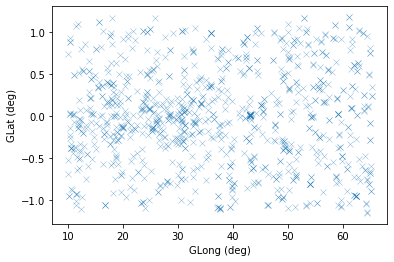

In [21]:
# We can plot directly using the MPL pyplot interface
# Here we plot the Galactic longitude and latitude of the data:
plt.scatter(allDF["l_deg"], allDF["b_deg"], marker="x", lw=0.5, alpha=0.5)
plt.xlabel("GLong (deg)")
plt.ylabel("GLat (deg)")


In [24]:
# Create a Figure (page)
fig = plt.figure(figsize=(12,8))


<Figure size 864x576 with 0 Axes>

In [ ]:
# For more complicated plots, we want to use the object oriented method
